In [33]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
#Importing Dataset
predict=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/titanic_test.csv')
df=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
#Import seaborn package
import seaborn as sb

In [36]:
df.shape

(891, 12)

In [37]:
#Checking null values
#True indicates value is null False indicates value isnt null
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,False,False,True,False


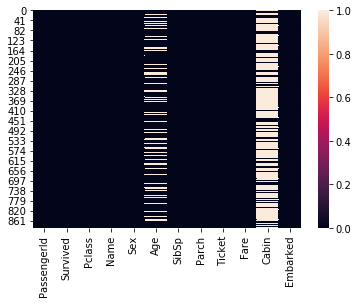

In [38]:
# Checking null values via heatmap
sb.heatmap(df.isnull())

Survived
0    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.336957x0.209722...
dtype: object

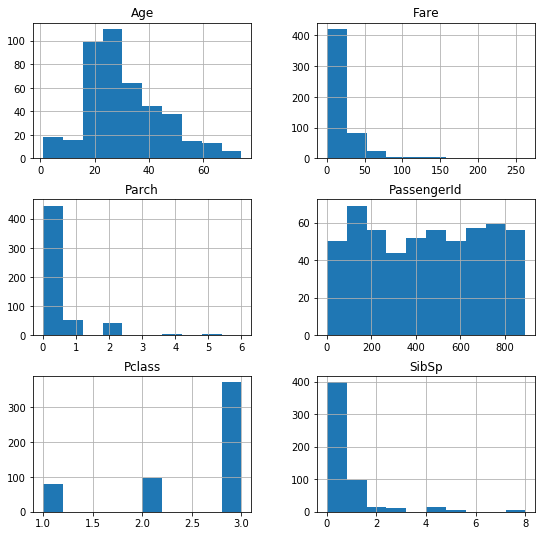

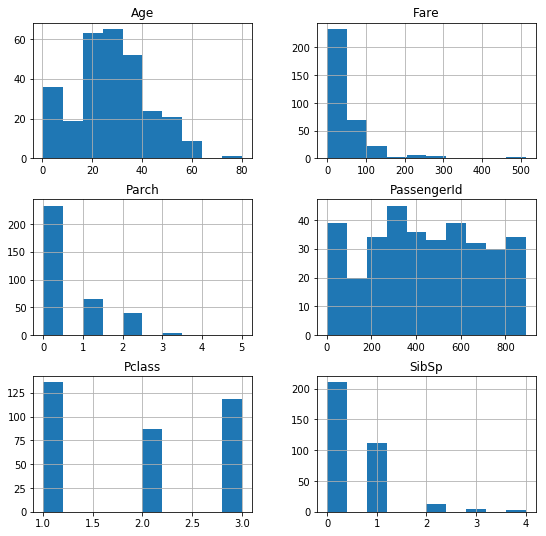

In [39]:
df.groupby('Survived').hist(figsize=(9,9))

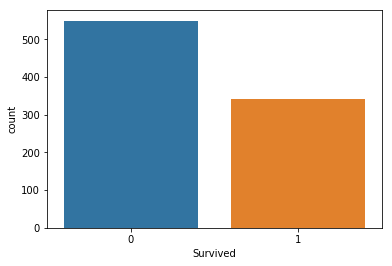

In [40]:
#Analysing number of passenger survived from data by just using a countplot.
#0 indicates died 1 indicates survived in the study that is done in all countplots below
sb.countplot(x='Survived',data=df)

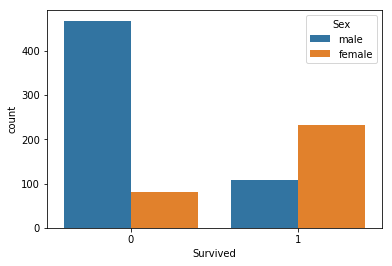

In [41]:
#Analysing the number of passenger survived by gender through countplot
sb.countplot(x='Survived',hue='Sex',data=df)

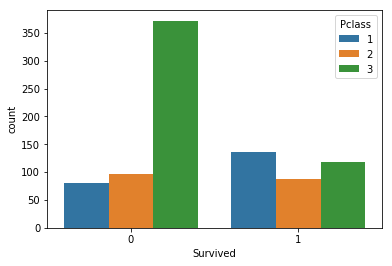

In [42]:
#Analysing the number of people survived through the class in which they travelled
sb.countplot(x='Survived',hue='Pclass',data=df)

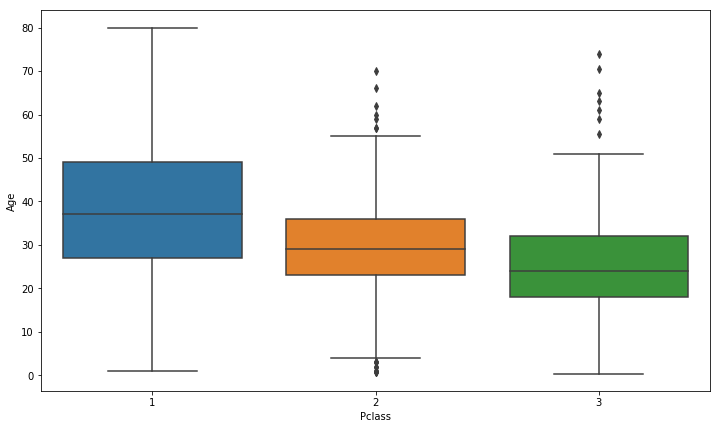

In [43]:
plt.figure(figsize=(12,7))
sb.boxplot(x='Pclass',y='Age',data=df)

In [44]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
        
    else:
        return Age

In [45]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

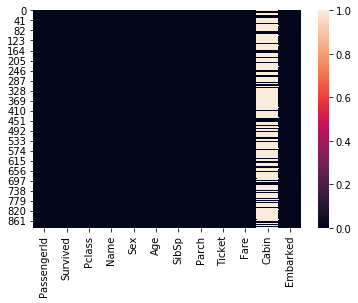

In [46]:
#Verifying it later using heatmap
sb.heatmap(df.isnull())

In [47]:
#Dropping the cabin column as it is contains many null valuues and this column isnt required for study as well
df.drop('Cabin',axis=1,inplace=True)

In [48]:
#Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [49]:
#Converting sex and embark column from characters into numbers
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [50]:
df.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [51]:
df=pd.concat([df,sex,embark],axis=1)

In [52]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [53]:
#Train test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.20,random_state=101)

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [55]:
learning_rates=[0.05,0.1,0.25,0.5,0.75,1]
for learning_rate in learning_rates:
    gb=GradientBoostingClassifier(n_estimators=20,learning_rate=learning_rate,random_state=0)
    gb.fit(X_train,y_train)
    print('Learning rate:',learning_rate)
    print('Accuracy score(training):{0:.3f}'.format(gb.score(X_train,y_train)))
    print('Accuracy score(validation):{0:.3f}'.format(gb.score(X_test,y_test)))
    print()

Learning rate: 0.05
Accuracy score(training):0.837
Accuracy score(validation):0.788

Learning rate: 0.1
Accuracy score(training):0.844
Accuracy score(validation):0.816

Learning rate: 0.25
Accuracy score(training):0.867
Accuracy score(validation):0.810

Learning rate: 0.5
Accuracy score(training):0.893
Accuracy score(validation):0.821

Learning rate: 0.75
Accuracy score(training):0.914
Accuracy score(validation):0.777

Learning rate: 1
Accuracy score(training):0.933
Accuracy score(validation):0.816



In [56]:
gb=GradientBoostingClassifier(n_estimators=20,learning_rate=0.5,random_state=0)
gb.fit(X_train,y_train)
predictions=gb.predict(X_test)
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))
print()
print('Classification Report')
print(classification_report(y_test,predictions))

Confusion Matrix
[[92  7]
 [25 55]]

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.93      0.85        99
           1       0.89      0.69      0.77        80

   micro avg       0.82      0.82      0.82       179
   macro avg       0.84      0.81      0.81       179
weighted avg       0.83      0.82      0.82       179



In [57]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [58]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC')
    plt.plot([1,0],[0,1],color='black',linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC(Receiver Operating Curve)')
    plt.legend()
    plt.show()
    

In [59]:
probs=gb.predict_proba(X_test)
probs

array([[0.90093625, 0.09906375],
       [0.03270043, 0.96729957],
       [0.34524992, 0.65475008],
       [0.13202738, 0.86797262],
       [0.92474129, 0.07525871],
       [0.98717075, 0.01282925],
       [0.75640533, 0.24359467],
       [0.93795443, 0.06204557],
       [0.06924736, 0.93075264],
       [0.54555629, 0.45444371],
       [0.92474129, 0.07525871],
       [0.75400644, 0.24599356],
       [0.16171173, 0.83828827],
       [0.97285911, 0.02714089],
       [0.97913413, 0.02086587],
       [0.94991506, 0.05008494],
       [0.59194542, 0.40805458],
       [0.84069316, 0.15930684],
       [0.84807668, 0.15192332],
       [0.13267625, 0.86732375],
       [0.85995615, 0.14004385],
       [0.93591291, 0.06408709],
       [0.31067767, 0.68932233],
       [0.55455795, 0.44544205],
       [0.98938034, 0.01061966],
       [0.60402214, 0.39597786],
       [0.81202891, 0.18797109],
       [0.78703132, 0.21296868],
       [0.66094997, 0.33905003],
       [0.91041729, 0.08958271],
       [0.

In [60]:
probs=probs[:,1]
probs

array([0.09906375, 0.96729957, 0.65475008, 0.86797262, 0.07525871,
       0.01282925, 0.24359467, 0.06204557, 0.93075264, 0.45444371,
       0.07525871, 0.24599356, 0.83828827, 0.02714089, 0.02086587,
       0.05008494, 0.40805458, 0.15930684, 0.15192332, 0.86732375,
       0.14004385, 0.06408709, 0.68932233, 0.44544205, 0.01061966,
       0.39597786, 0.18797109, 0.21296868, 0.33905003, 0.08958271,
       0.82755268, 0.75408028, 0.68932233, 0.65714749, 0.13188342,
       0.91131326, 0.11660656, 0.23629663, 0.16949982, 0.54891194,
       0.48783621, 0.45444371, 0.95258114, 0.15192332, 0.05175005,
       0.24359467, 0.05448511, 0.49598314, 0.10497278, 0.07525871,
       0.63697491, 0.42521938, 0.93788835, 0.72704235, 0.68932233,
       0.03583026, 0.05117721, 0.03143364, 0.13017557, 0.9368057 ,
       0.91131326, 0.01797333, 0.00645757, 0.49158574, 0.00966207,
       0.08412277, 0.94611982, 0.18771392, 0.68253477, 0.17530462,
       0.2962366 , 0.05117721, 0.05117721, 0.07120902, 0.62369

In [61]:
auc=roc_auc_score(y_test,probs)
print('AUC:%.2f'%auc)

AUC:0.86


In [62]:
fpr,tpr,thresholds=roc_curve(y_test,probs)

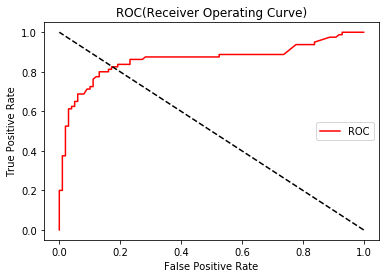

In [31]:
plot_roc_curve(fpr,tpr)

In [64]:
predict.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
psex=pd.get_dummies(predict['Sex'],drop_first=True)
pembark=pd.get_dummies(predict['Embarked'],drop_first=True)
predict=predict.drop(['PassengerId','Name','Ticket','Cabin','Sex','Embarked'],axis=1)
predict=pd.concat([predict,psex,pembark],axis=1)
predict.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [66]:
predict.describe()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000,418.000000,418.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188,0.636364,0.110048,0.645933
std,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622,0.313324,0.478803
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000,0.000000,1.000000
max,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000,1.000000


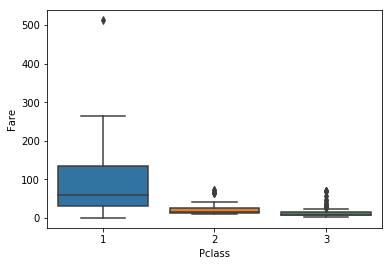

In [67]:
sb.boxplot(x=predict['Pclass'],y=predict['Fare'])

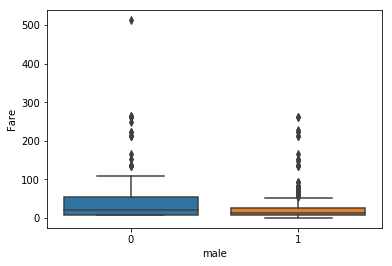

In [68]:
sb.boxplot(x=predict['male'],y=predict['Fare'])

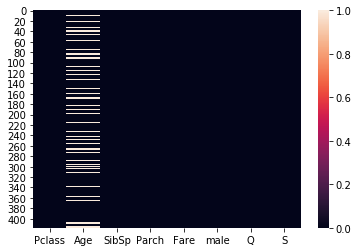

In [69]:
sb.heatmap(predict.isnull())

In [70]:
def impute_age(cols):
    Age= cols[0]
    Pclass =cols[1]
    
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [71]:
predict['Age']=predict[['Age','Pclass']].apply(impute_age,axis=1)

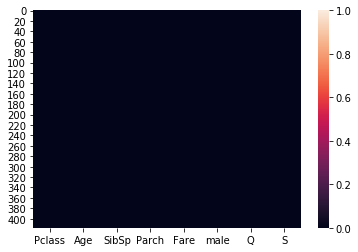

In [72]:
sb.heatmap(predict.isnull())

In [73]:
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      417 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [74]:
predict=predict.fillna(6.74)
predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
Pclass    418 non-null int64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
male      418 non-null uint8
Q         418 non-null uint8
S         418 non-null uint8
dtypes: float64(2), int64(3), uint8(3)
memory usage: 17.6 KB


In [76]:
new_pred=gb.predict(predict.values)

In [77]:
len(new_pred)

418

In [78]:
new_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
new_pred=pd.DataFrame(new_pred)
new_pred.rename(columns={0:'Survived'},inplace=True)
new_pred.head()

,Survived
0,0
1,0
2,1
3,0
4,0


In [83]:
predicts=pd.read_csv('C:/Users/aksha/Desktop/ai/datasets/titanic_test.csv')
predicts.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [84]:
id=pd.DataFrame(predicts['PassengerId'])
predictions=pd.concat([id,new_pred],axis=1)

In [85]:
predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0


In [86]:
predictions.shape

(418, 2)

In [87]:
predictions.to_csv('Predicted.csv',index=False)

In [88]:
predicts['Cabin'].unique()

array([nan, 'B45', 'E31', 'B57 B59 B63 B66', 'B36', 'A21', 'C78', 'D34',
       'D19', 'A9', 'D15', 'C31', 'C23 C25 C27', 'F G63', 'B61', 'C53',
       'D43', 'C130', 'C132', 'C101', 'C55 C57', 'B71', 'C46', 'C116',
       'F', 'A29', 'G6', 'C6', 'C28', 'C51', 'E46', 'C54', 'C97', 'D22',
       'B10', 'F4', 'E45', 'E52', 'D30', 'B58 B60', 'E34', 'C62 C64',
       'A11', 'B11', 'C80', 'F33', 'C85', 'D37', 'C86', 'D21', 'C89',
       'F E46', 'A34', 'D', 'B26', 'C22 C26', 'B69', 'C32', 'B78',
       'F E57', 'F2', 'A18', 'C106', 'B51 B53 B55', 'D10 D12', 'E60',
       'E50', 'E39 E41', 'B52 B54 B56', 'C39', 'B24', 'D28', 'B41', 'C7',
       'D40', 'D38', 'C105'], dtype=object)